<a href="https://colab.research.google.com/github/lhmelton/prophet-challenge/blob/main/forecasting_net_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forecasting Net Prophet

You’re a growth analyst at [MercadoLibre](http://investor.mercadolibre.com/about-us). With over 200 million users, MercadoLibre is the most popular e-commerce site in Latin America. You've been tasked with analyzing the company's financial and user data in clever ways to make the company grow. So, you want to find out if the ability to predict search traffic can translate into the ability to successfully trade the stock.

The instructions for this Challenge are divided into four steps, as follows:

* Step 1: Find unusual patterns in hourly Google search traffic

* Step 2: Mine the search traffic data for seasonality

* Step 3: Relate the search traffic to stock price patterns

* Step 4: Create a time series model with Prophet

The following subsections detail these steps.

## Install and import the required libraries and dependencies

In [42]:
#Lane
# Install required libraries (assuming use in a Jupyter notebook or similar environment)
!pip install pandas numpy matplotlib prophet

# Import necessary libraries
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline

## Step 1: Find Unusual Patterns in Hourly Google Search Traffic

The data science manager asks if the Google search traffic for the company links to any financial events at the company. Or, does the search traffic data just present random noise? To answer this question, pick out any unusual patterns in the Google search data for the company, and connect them to the corporate financial events.

To do so, complete the following steps:

1. Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

2. Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?


#### Step 1: Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

In [43]:
# Load Google search traffic data
df_search_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date',
    parse_dates=True
).dropna()

# Load stock price data
df_stock_price = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/mercado_stock_price.csv",
    index_col="date",
    parse_dates=True
).dropna()

# Combine both datasets into a single DataFrame
df_combined = pd.concat([df_search_trends, df_stock_price], axis=1).dropna()

#view dataframes
display(df_search_trends.head())
display(df_stock_price.tail())

<ipython-input-43-4a40903ece69>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_search_trends = pd.read_csv(


,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38


,close
date,
2020-07-31 11:00:00,1105.780
2020-07-31 12:00:00,1087.925
2020-07-31 13:00:00,1095.800
2020-07-31 14:00:00,1110.650
2020-07-31 15:00:00,1122.510


In [44]:

df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date',
    parse_dates=True,
    infer_datetime_format=True
).dropna()

# Review the first and last five rows of the DataFrame
display(df_mercado_trends.head())
display(df_mercado_trends.tail())


<ipython-input-44-5d6c4abf9887>:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_mercado_trends = pd.read_csv(
<ipython-input-44-5d6c4abf9887>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends = pd.read_csv(


,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38


,Search Trends
Date,
2020-09-07 20:00:00,71
2020-09-07 21:00:00,83
2020-09-07 22:00:00,96
2020-09-07 23:00:00,97
2020-09-08 00:00:00,96


Total traffic for May 2020: Search Trends    38181
dtype: int64
Monthly median traffic: Search Trends    35172.5
dtype: float64


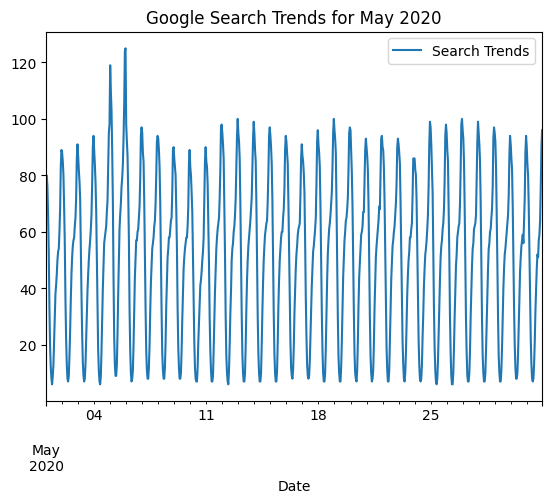

In [45]:
# Slice May 2020 search data and plot
may_trends = df_search_trends.loc['2020-05']
may_trends.plot(title="Google Search Trends for May 2020")

# Calculate and compare total search traffic for May 2020 to the monthly median
total_may_traffic = may_trends.sum()
monthly_traffic_median = df_search_trends.resample('M').sum().median()
print(f"Total traffic for May 2020: {total_may_traffic}")
print(f"Monthly median traffic: {monthly_traffic_median}")


#### Step 2: Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?

In [46]:
# Calculate the sum of the total search traffic for May 2020

traffic_may_2020 = may_trends["Search Trends"].sum()

# View the traffic_may_2020 value

display (traffic_may_2020)

38181

In [48]:

import pandas as pd

# Assuming you have already loaded your data into `df_mercado_trends` and sliced `may_trends`
# For example, loading and slicing might look like this:
# df_mercado_trends = pd.read_csv('your_data.csv', index_col='Date', parse_dates=True)
# may_trends = df_mercado_trends['2020-05']

# Calculate the total search traffic for May 2020
traffic_may_2020 = may_trends['Search Trends'].sum()

# Calculate the median of the monthly traffic
# Assuming the 'Search Trends' is the correct column name that contains the search traffic data
monthly_traffic = df_mercado_trends['Search Trends'].resample('M').sum()
median_monthly_traffic = monthly_traffic.median()

# Display the traffic for May 2020
print("Traffic for May 2020:", traffic_may_2020)

# To compare the search traffic for the month of May 2020 to the overall monthly median value
# Divide the May traffic total by the median monthly traffic
comparison_ratio = traffic_may_2020 / median_monthly_traffic
print("Comparison Ratio:", comparison_ratio)



Traffic for May 2020: 38181
Comparison Ratio: 1.0855355746677091


##### Answer the following question:

**Question:** Did the Google search traffic increase during the month that MercadoLibre released its financial results?

**Answer:**

## Step 2: Mine the Search Traffic Data for Seasonality

Marketing realizes that they can use the hourly search data, too. If they can track and predict interest in the company and its platform for any time of day, they can focus their marketing efforts around the times that have the most traffic. This will get a greater return on investment (ROI) from their marketing budget.

To that end, you want to mine the search traffic data for predictable seasonal patterns of interest in the company. To do so, complete the following steps:

1. Group the hourly search data to plot the average traffic by the hour of day. Does the search traffic peak at a particular time of day or is it relatively consistent?

2. Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday). Does the search traffic get busiest on any particular day of the week?

3. Group the hourly search data to plot the average traffic by the week of the year. Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?


#### Step 1: Group the hourly search data to plot the average traffic by the hour of the day.

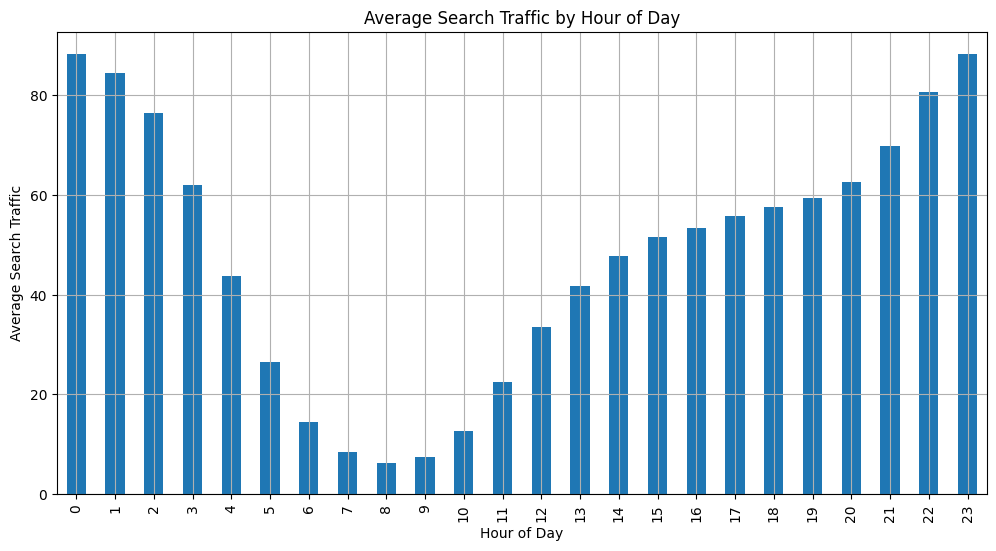

In [49]:
import matplotlib.pyplot as plt

# Assuming df_search_trends is your DataFrame with a DateTime index
# Make sure df_search_trends has 'Search Trends' as a column with the traffic data

# 1. Group the hourly search data to plot the average traffic by the hour of day
hourly_average = df_search_trends.groupby(df_search_trends.index.hour).mean()
plt.figure(figsize=(12, 6))
hourly_average['Search Trends'].plot(kind='bar')
plt.title('Average Search Traffic by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Search Traffic')
plt.grid(True)
plt.show()




#### Step 2: Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday).

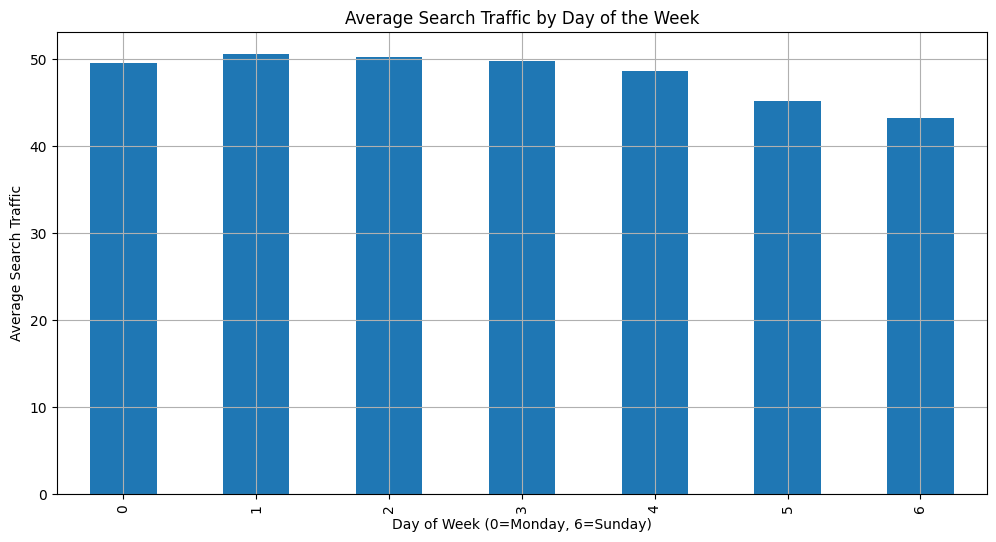

In [50]:
# 2. Group the hourly search data to plot the average traffic by the day of the week
weekly_average = df_search_trends.groupby(df_search_trends.index.dayofweek).mean()
plt.figure(figsize=(12, 6))
weekly_average['Search Trends'].plot(kind='bar')
plt.title('Average Search Traffic by Day of the Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Average Search Traffic')
plt.grid(True)
plt.show()

#### Step 3: Group the hourly search data to plot the average traffic by the week of the year.

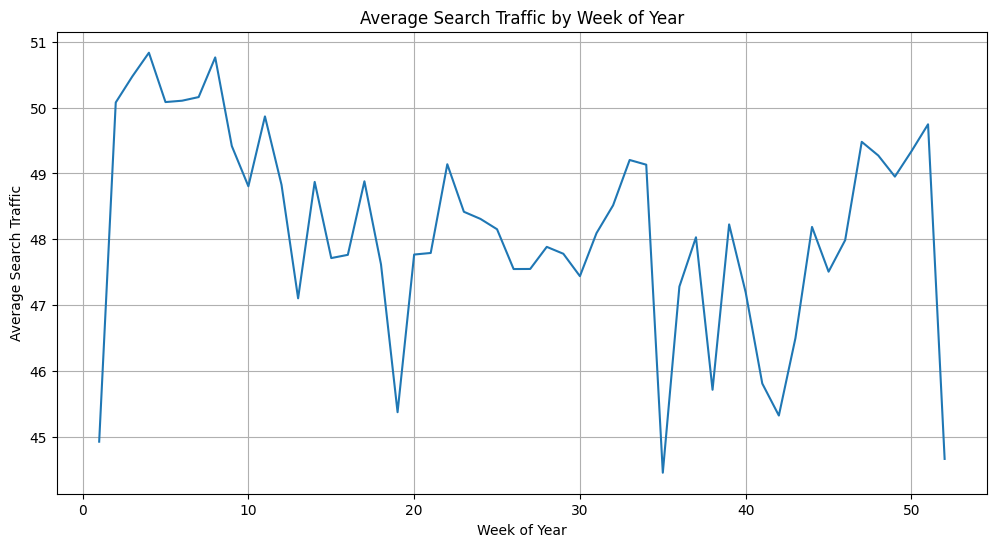

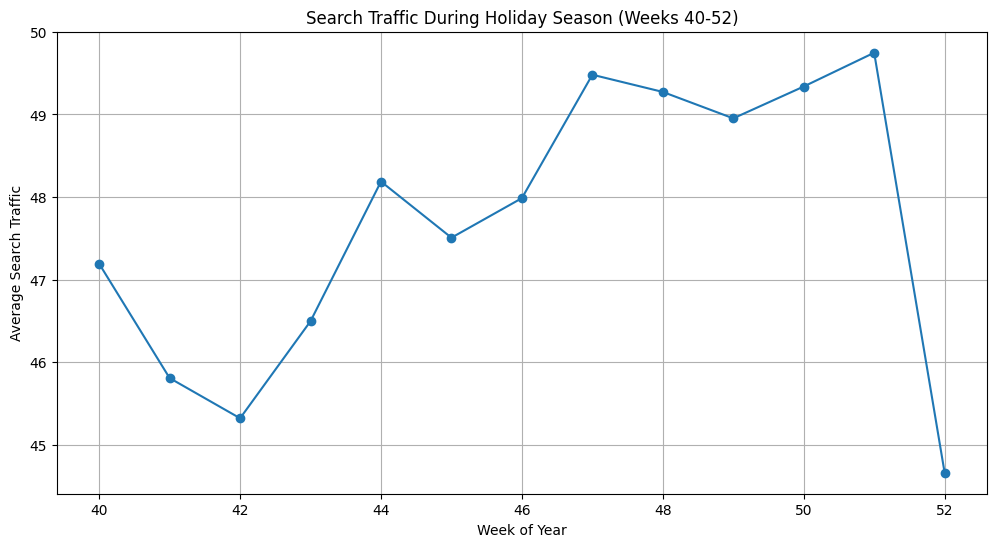

In [51]:
# 3. Group the hourly search data to plot the average traffic by the week of the year
weekly_year_average = df_search_trends.groupby(df_search_trends.index.isocalendar().week).mean()
plt.figure(figsize=(12, 6))
weekly_year_average['Search Trends'].plot()
plt.title('Average Search Traffic by Week of Year')
plt.xlabel('Week of Year')
plt.ylabel('Average Search Traffic')
plt.grid(True)
plt.show()

#Weeks 40-52
# Analyze trends for holiday season weeks 40 to 52
holiday_season_traffic = weekly_year_average.loc[40:52]
plt.figure(figsize=(12, 6))
holiday_season_traffic['Search Trends'].plot(marker='o')
plt.title('Search Traffic During Holiday Season (Weeks 40-52)')
plt.xlabel('Week of Year')
plt.ylabel('Average Search Traffic')
plt.grid(True)
plt.show()

##### Answer the following question:

**Question:** Are there any time based trends that you can see in the data?

**Answer:**

## Step 3: Relate the Search Traffic to Stock Price Patterns

You mention your work on the search traffic data during a meeting with people in the finance group at the company. They want to know if any relationship between the search data and the company stock price exists, and they ask if you can investigate.

To do so, complete the following steps:

1. Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

2. Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

3. Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

    * “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

    * “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis

4. Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?


#### Step 1: Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

In [52]:
## df_search_trends and df_stock_price are already defined and indexed by datetime
df_combined = pd.concat([df_search_trends, df_stock_price], axis=1).dropna()
df_combined['Lagged Search Trends'] = df_combined['Search Trends'].shift(1)
df_combined['Stock Volatility'] = df_combined['close'].rolling(window=4).std()
df_combined['Hourly Stock Return'] = df_combined['close'].pct_change() * 100

# Analyze correlations
correlation_matrix = df_combined[['Stock Volatility', 'Lagged Search Trends', 'Hourly Stock Return']].corr()
print(correlation_matrix)



                      Stock Volatility  Lagged Search Trends  \
Stock Volatility              1.000000             -0.118945   
Lagged Search Trends         -0.118945              1.000000   
Hourly Stock Return           0.046723              0.017929   

                      Hourly Stock Return  
Stock Volatility                 0.046723  
Lagged Search Trends             0.017929  
Hourly Stock Return              1.000000  


#### Step 2: Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

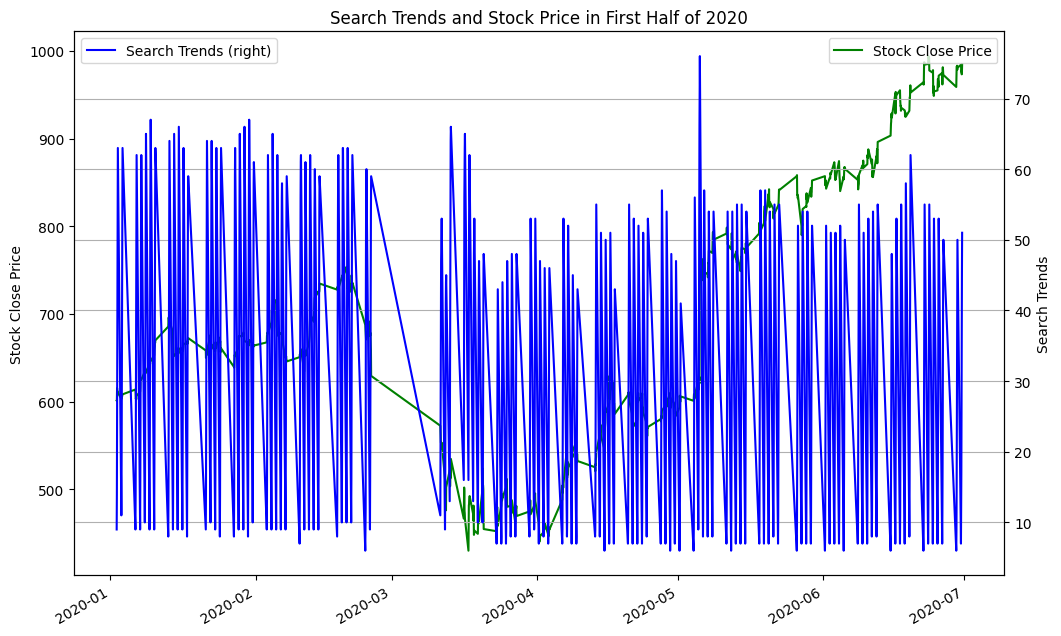

In [53]:
# Slice the data to just the first half of 2020
df_first_half_2020 = df_combined.loc['2020-01-01':'2020-06-30']

# Plot the data to observe trends
plt.figure(figsize=(12, 8))
ax = df_first_half_2020['Search Trends'].plot(color='blue', grid=True, label='Search Trends', secondary_y=True)
ax2 = df_first_half_2020['close'].plot(color='green', grid=True, label='Stock Close Price')

ax.set_ylabel('Search Trends')
ax2.set_ylabel('Stock Close Price')
ax.set_title('Search Trends and Stock Price in First Half of 2020')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()


##### Answer the following question:

**Question:** Do both time series indicate a common trend that’s consistent with this narrative?

**Answer:** In truth, our evidence of a common trend between search activity and stock price is pretty limited. It does appear generally however that the low point for Mercado Libre's stock price, late March to early April, did coincide with lower search activity for the firm. Search activity does pick up along with its stock price, although the stock price from mid-April onward definitively outpaces search interest.

There's one important thing to note: if you zoom in both graphs to the spike around May 5th, 2020, you'll find the date of the company's earnings release to the public. It looks like search traffic for the firm spiked about two hours before the firm's stock price spiked. This could indicate a predictable pattern (can Google Searches predict the stock price?), but an alternative explanation might just be that people tend to search for more information about the firm right before an earnings announcement gets released. We'd need to do a little more time-series research to see which explanation best fits the data.

#### Step 3: Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

* “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

* “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis


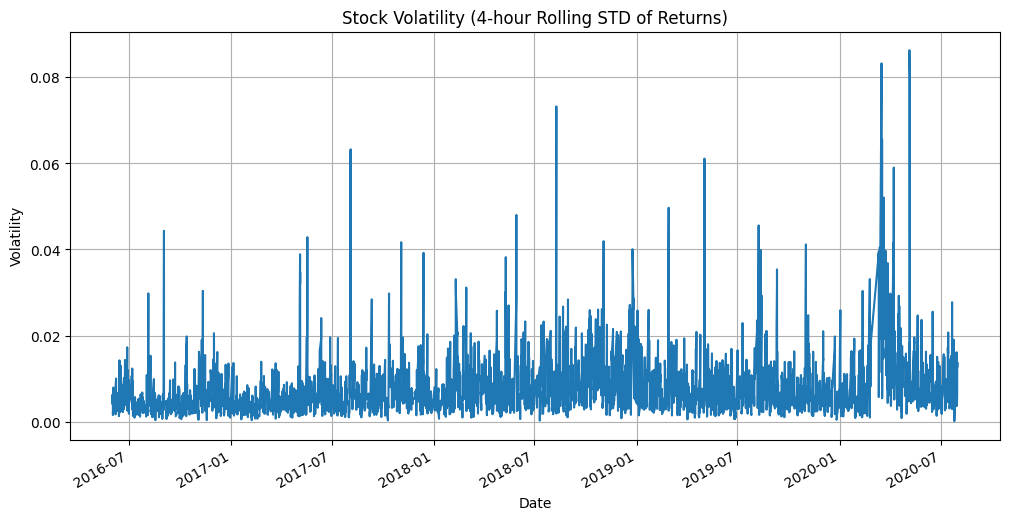

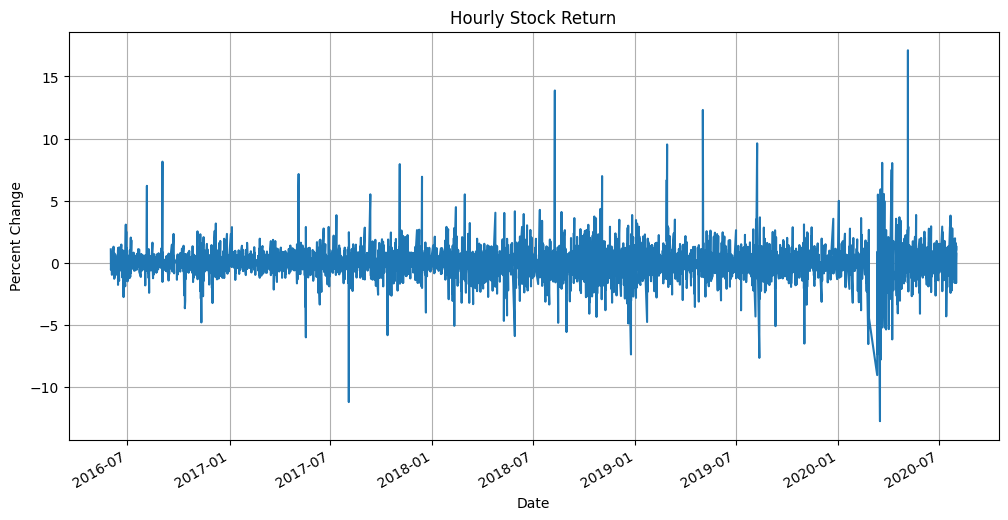

In [54]:
# Create a new column for lagged search trends
df_combined['Lagged Search Trends'] = df_combined['Search Trends'].shift(1)

# Create a column for stock volatility
df_combined['Stock Volatility'] = df_combined['close'].pct_change().rolling(window=4).std()

# Create a column for hourly stock return
df_combined['Hourly Stock Return'] = df_combined['close'].pct_change() * 100

# Plot Stock Volatility and Hourly Stock Return
plt.figure(figsize=(12, 6))
df_combined['Stock Volatility'].plot(title='Stock Volatility (4-hour Rolling STD of Returns)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
df_combined['Hourly Stock Return'].plot(title='Hourly Stock Return')
plt.xlabel('Date')
plt.ylabel('Percent Change')
plt.grid(True)
plt.show()


#### Step 4: Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

Correlation Matrix:
                      Lagged Search Trends  Stock Volatility  \
Lagged Search Trends              1.000000         -0.148938   
Stock Volatility                 -0.148938          1.000000   
Hourly Stock Return               0.017929          0.061424   

                      Hourly Stock Return  
Lagged Search Trends             0.017929  
Stock Volatility                 0.061424  
Hourly Stock Return              1.000000  


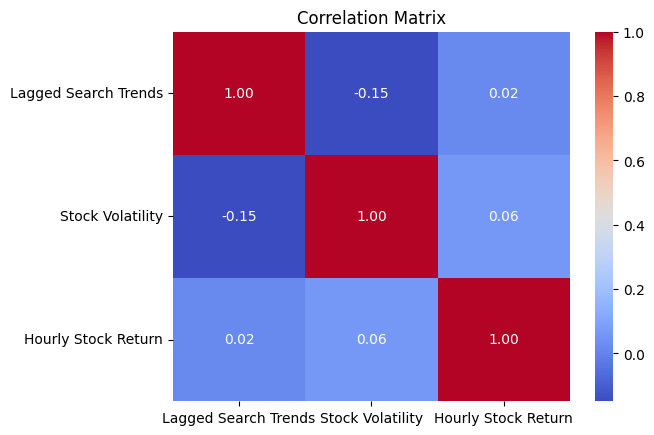

In [55]:
# Calculate correlations
correlations = df_combined[['Lagged Search Trends', 'Stock Volatility', 'Hourly Stock Return']].corr()
print("Correlation Matrix:")
print(correlations)

# Optionally, visualize correlations using seaborn
import seaborn as sns

sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


##### Answer the following question:


**Question:** Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

**Answer:** If we read down the second column (or read along the second row), we see that there's a slight negative correlation between searches for the firm and its subsequent stock volatility. More searches (slightly) tend to indicate less near-term hourly stock risk for the firm.

On the other hand, there's a positive correlation between search activity in one hour and stock returns in the next: as search activity goes up, so will the firm's stock price in the short term. This effect is very weak though, only half the size of the effect on stock volatility. With the correlation so close to zero, some might also say that there's almost no relationship between these two variables whatsoever, and that the small findings that we do have could be just due to chance. While there's no required threshold when looking at correlation between stock returns and the variables used to predict them, it does tend to be that correlations in this context tend to be very low across the board. It's hard to predict the market!

## Step 4: Create a Time Series Model with Prophet

Now, you need to produce a time series model that analyzes and forecasts patterns in the hourly search data. To do so, complete the following steps:

1. Set up the Google search data for a Prophet forecasting model.

2. After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

3. Plot the individual time series components of the model to answer the following questions:

    * What time of day exhibits the greatest popularity?

    * Which day of the week gets the most search traffic?

    * What's the lowest point for search traffic in the calendar year?


#### Step 1: Set up the Google search data for a Prophet forecasting model.


#### Step 2: After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

#### Step 3: Plot the individual time series components of the model to answer the following questions:

* What time of day exhibits the greatest popularity?

* Which day of the week gets the most search traffic?

* What's the lowest point for search traffic in the calendar year?


In [56]:
#The following code answers the previous questions listed above
from prophet import Prophet
import pandas as pd

# df_search_trends is already loaded and contains 'Search Trends' with a DateTime index

# Reset index to get the date into a column
df_prophet = df_search_trends.reset_index().rename(columns={'Date': 'ds', 'Search Trends': 'y'})

# Make sure there are no NaN values in the DataFrame (Prophet cannot handle them)
df_prophet = df_prophet.dropna()

# Initialize the Prophet model
model = Prophet()

# Fit the model to your data
model.fit(df_prophet)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpa6j__xz1/eixhhijm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa6j__xz1/6qll0rbl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85673', 'data', 'file=/tmp/tmpa6j__xz1/eixhhijm.json', 'init=/tmp/tmpa6j__xz1/6qll0rbl.json', 'output', 'file=/tmp/tmpa6j__xz1/prophet_modelvr7wi1ta/prophet_model-20240421185619.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:56:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:56:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


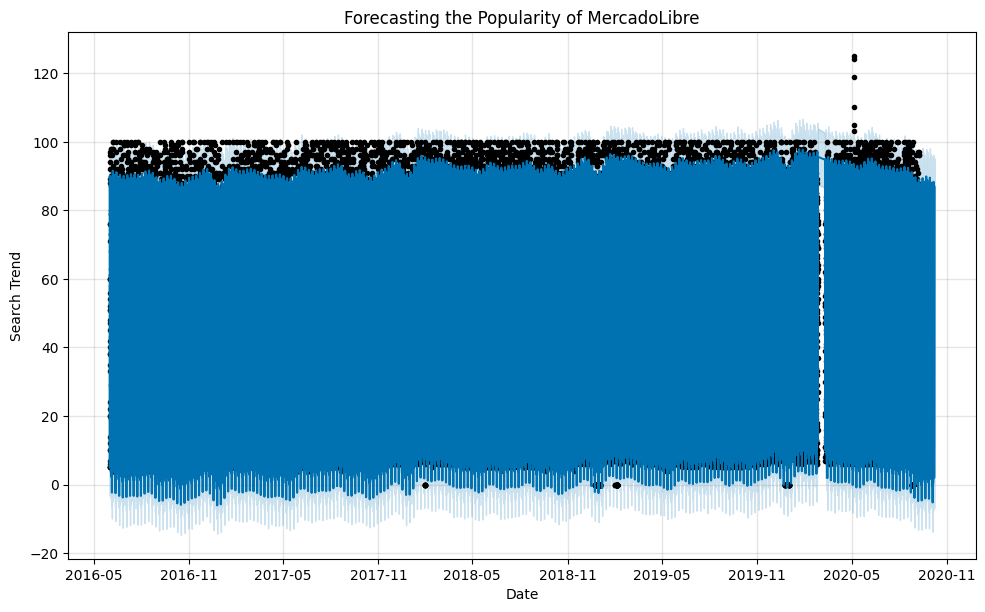

In [57]:
import matplotlib.pyplot as plt

# Create a future dataframe to hold predictions
future_dates = model.make_future_dataframe(periods=720, freq='H')  # forecasting for the next 720 hours (30 days)

# Predict the future trends
forecast = model.predict(future_dates)

# Plot the forecast
fig = model.plot(forecast)
plt.title('Forecasting the Popularity of MercadoLibre')
plt.xlabel('Date')
plt.ylabel('Search Trend')
plt.show()


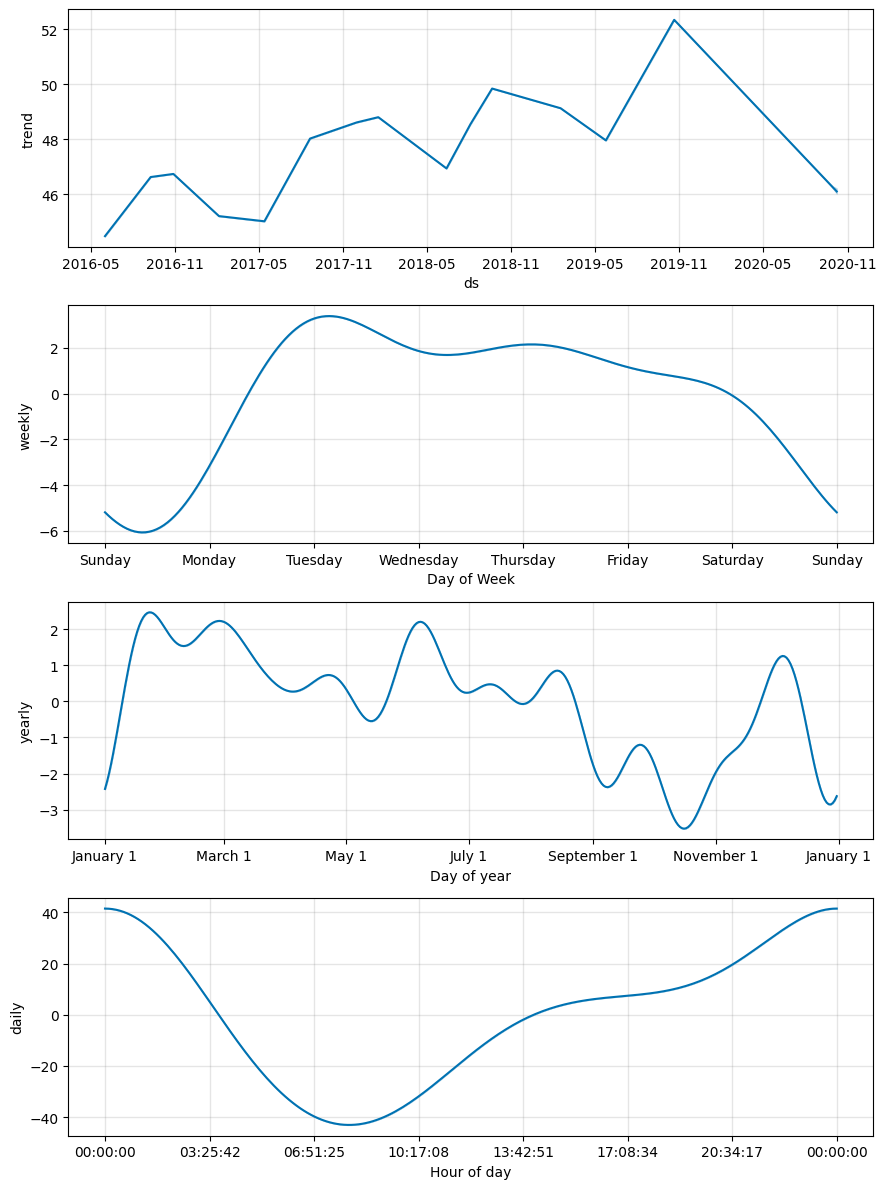

In [58]:
# Plot the components of the forecast
components_fig = model.plot_components(forecast)
plt.show()


##### Answer the following question:

**Question:**  How's the near-term forecast for the popularity of MercadoLibre?

**Answer:**


##### Answer the following questions:

**Question:** What time of day exhibits the greatest popularity?

**Answer:**

**Question:** Which day of week gets the most search traffic?
   
**Answer:**

**Question:** What's the lowest point for search traffic in the calendar year?

**Answer:**
